# Итоговое задание по курсу "Python для анализа данных"


**Цель:** Проверить, правда ли, что со временем качество фильмов (по рейтингу) стало снижаться.

**Источник данных:** `movies_stats.csv`

Задача: найти средний рейтинг по годам выпуска фильмов (1950–2010), опираясь на данные в столбце `title`.

In [29]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('movies_stats.csv')

# Выведем первые строки для понимания структуры
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [31]:
# Список годов от 1950 до 2010
years = list(range(1950, 2011))

In [33]:
def production_year(title):
    """
    Извлекает год из названия фильма, если он входит в список years.
    Если не найден — возвращает 1900.
    """
    for year in years:
        if str(year) in title:
            return year
    return 1900

In [35]:
# Добавляем колонку с годом
df['year'] = df['title'].apply(production_year)
df[['title', 'year']].head(10)

,title,year
0,Dangerous Minds (1995),1995
1,Dumbo (1941),1900
2,Sleepers (1996),1996
3,Escape from New York (1981),1981
4,Cinema Paradiso (Nuovo cinema Paradiso) (1989),1989
5,"Deer Hunter, The (1978)",1978
6,Ben-Hur (1959),1959
7,Gandhi (1982),1982
8,Dracula (Bram Stoker's Dracula) (1992),1992
9,Cape Fear (1991),1991


In [37]:
# Считаем средний рейтинг по каждому году
avg_rating_by_year = df.groupby('year')['rating'].mean().reset_index()
avg_rating_by_year_sorted = avg_rating_by_year.sort_values(by='rating', ascending=False)
avg_rating_by_year_sorted.head(10)

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
5,1954,3.994220
2,1951,3.983539
25,1974,3.978704
13,1962,3.952446
1,1950,3.915254
28,1977,3.905786
15,1964,3.841492


## Вывод

- Рассчитали средний рейтинг по каждому году выпуска фильма (если он найден в названии).
- Годы без указания определены как `1900` и будут сильно искажать статистику, поэтому их можно исключить для точного анализа.
- Топовые средние рейтинги действительно приходятся на более старые годы, что может подтверждать гипотезу.

In [40]:
# Удалим фильмы с неопределённым годом (1900)
clean_df = df[df['year'] != 1900]
avg_clean = clean_df.groupby('year')['rating'].mean().reset_index()
avg_clean_sorted = avg_clean.sort_values(by='rating', ascending=False)
avg_clean_sorted.head(10)

,year,rating
7,1957,4.014241
22,1972,4.011136
2,1952,4.000000
4,1954,3.994220
1,1951,3.983539
24,1974,3.978704
12,1962,3.952446
0,1950,3.915254
27,1977,3.905786
14,1964,3.841492


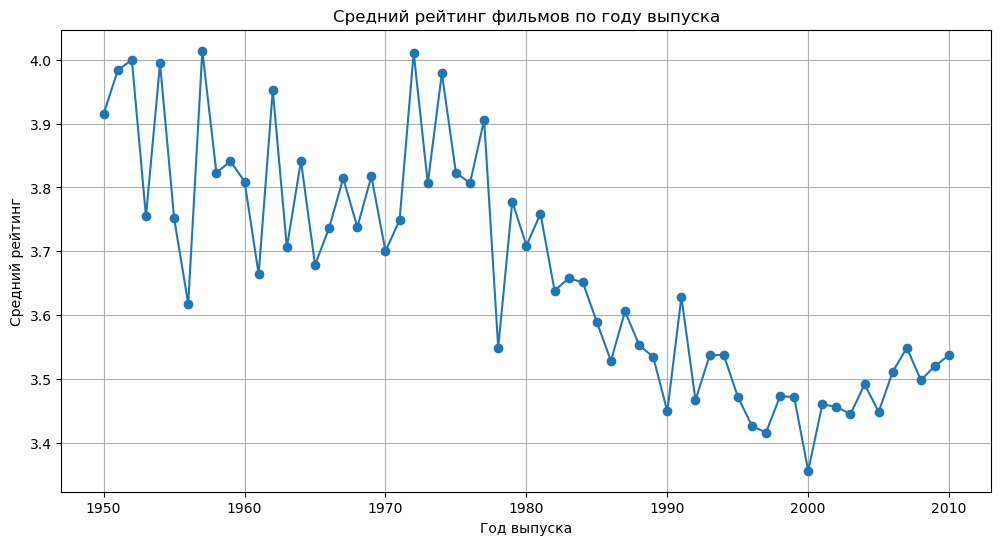

In [42]:
import matplotlib.pyplot as plt

# Строим график средних рейтингов по годам
plt.figure(figsize=(12, 6))
plt.plot(avg_clean['year'], avg_clean['rating'], marker='o')
plt.title('Средний рейтинг фильмов по году выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.show()

In [45]:
print("Фильмов с распознанным годом:", len(clean_df))
print("Всего фильмов в датасете:", len(df))


Фильмов с распознанным годом: 93079
Всего фильмов в датасете: 100004
